In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats, optimize

https://stackoverflow.com/questions/77487776/fittig-a-rice-distribution-using-scipy

In [2]:
nu = 8.5
sigma = 10.5
n = 30000
b = nu / sigma

np.random.seed(12345)

X = stats.rice(b=b, scale=sigma)
data = X.rvs(size=n)

In [3]:
xlin = np.linspace(0, 50, 200)

In [4]:
density, bins = np.histogram(data, 100, density=1.)
centers = (bins[:-1] + bins[1:]) / 2

In [5]:
centers

array([ 0.31279045,  0.8273872 ,  1.34198395,  1.85658069,  2.37117744,
        2.88577419,  3.40037094,  3.91496769,  4.42956443,  4.94416118,
        5.45875793,  5.97335468,  6.48795142,  7.00254817,  7.51714492,
        8.03174167,  8.54633842,  9.06093516,  9.57553191, 10.09012866,
       10.60472541, 11.11932215, 11.6339189 , 12.14851565, 12.6631124 ,
       13.17770915, 13.69230589, 14.20690264, 14.72149939, 15.23609614,
       15.75069289, 16.26528963, 16.77988638, 17.29448313, 17.80907988,
       18.32367662, 18.83827337, 19.35287012, 19.86746687, 20.38206362,
       20.89666036, 21.41125711, 21.92585386, 22.44045061, 22.95504735,
       23.4696441 , 23.98424085, 24.4988376 , 25.01343435, 25.52803109,
       26.04262784, 26.55722459, 27.07182134, 27.58641808, 28.10101483,
       28.61561158, 29.13020833, 29.64480508, 30.15940182, 30.67399857,
       31.18859532, 31.70319207, 32.21778882, 32.73238556, 33.24698231,
       33.76157906, 34.27617581, 34.79077255, 35.3053693 , 35.81

In [6]:
def model(x, b, loc, scale):
    return stats.rice.pdf(x, b=b, loc=loc, scale=scale)

In [7]:
popt, pcov = optimize.curve_fit(model, centers, density)

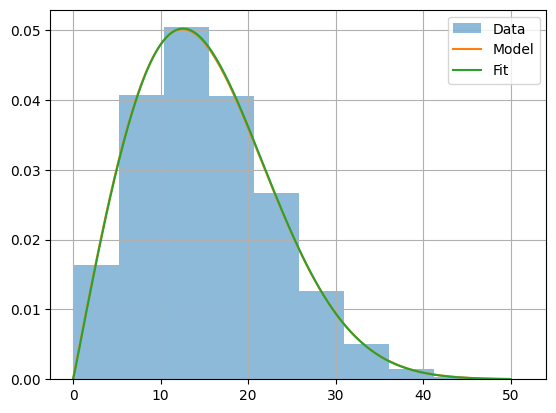

In [8]:
fig, axe = plt.subplots()
axe.hist(data, alpha=0.5, density=1.0, label="Data")
axe.plot(xlin, X.pdf(xlin), label="Model")
axe.plot(xlin, model(xlin, *popt), label="Fit")
axe.legend()
axe.grid()